In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
path = 'Lecture_4.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,date,Oil,Gas
0,5/8/13,103.79,3.86
1,5/9/13,103.59,3.87
2,5/10/13,101.31,3.90
3,5/13/13,102.17,3.87
4,5/14/13,102.70,3.93


In [4]:
df.columns = ['Date', 'Oil', 'Gas']

In [5]:
df.head()

,Date,Oil,Gas
0,5/8/13,103.79,3.86
1,5/9/13,103.59,3.87
2,5/10/13,101.31,3.90
3,5/13/13,102.17,3.87
4,5/14/13,102.70,3.93


In [6]:
df.dropna(axis=1, how='any', inplace=True)

### Formula
<img src="http://chart.googleapis.com/chart?cht=tx&chl=\Large x=\frac{Averageof x days' up closes}{Average of x days' down closes}" style="border:none;">

In [7]:
s = 1272

In [8]:
def RS(mean_up, mean_down):
    return mean_up / mean_down

In [9]:
def RSI(rs):
    return 100 - 100 / (1 + rs)

In [10]:
nth_list = []
steps = [5, 9, 14]

In [96]:
def rsi_df(s, step, nth_list):
    rs_list = []
    rsi_list = []
    # 14 is the step
    nth = np.random.randint(0,step - 1)
    nth_list.append(nth)
    date_list = []
    oil_price = []
    oil_test = []
    for i in range(0, s, step):
        up_sum = 0
        up_flag = 0
        down_sum = 0
        down_flag = 0

        flag = 0
        if i + 14 > s:
                break
        for j in range(i, i + 14):
            if flag == 12:
                break
            r = df.iloc[j + 1]['Oil'] - df.iloc[j]['Oil']
            if r > 0:
                up_sum = up_sum + df.iloc[j + 1]['Oil']
                up_flag = up_flag + 1
            if r < 0:
                down_sum = down_sum + df.iloc[j + 1]['Oil']
                down_flag = down_flag + 1
            j = j + 1
            flag = flag +1

        mean_up = up_sum / up_flag
        mean_down = down_sum / down_flag


        rs = RS(mean_up, mean_down)
        rsi = RSI(rs)

        rs_list.append(rs)
        rsi_list.append(rsi)

        # Get date
        date = df.iloc[i + step -1]["Date"]
        # Get Price
        price = df.iloc[i + nth]["Oil"]

        date_list.append(date)
        oil_price.append(price)
        
        oil_test = pd.DataFrame({"date": date_list, "oil_price": oil_price, "rsi": rsi_list})
    
    return oil_test, nth

In [12]:
def change(xx, baseline):
    if xx < baseline:
        return -1
    if xx > baseline:
        return 1

In [14]:
def profit(df):
    profit = 0
    signal = 0
    date = []
    trading_signal = []
    price_list = []
    for index in df.index:
        sig = df.loc[index]["signal"]
        if sig != signal:
            if sig == -1:
                price = df.loc[index]["oil_price"]
#                 print("Sell at the price of {0} on {1}\n".format(price,df.loc[index]["date"]))
                profit = profit + price
            if sig == 1:
                price = df.loc[index]["oil_price"]
#                 print("Buy at the price of {0} on {1}\n".format(price,df.loc[index]["date"]))
                profit = profit - price
            date.append(df.loc[index]["date"])
            trading_signal.append(sig)
            price_list.append(df.loc[index]["oil_price"])
        signal = sig
    datf = {"date": date, "signal": trading_signal, "price": price_list}
    df = pd.DataFrame(datf)
    print(type(profit))
    return profit, df

In [15]:
profit
# mean std percent

<function __main__.profit>

In [16]:
df.head()

,Date,Oil,Gas
0,5/8/13,103.79,3.86
1,5/9/13,103.59,3.87
2,5/10/13,101.31,3.90
3,5/13/13,102.17,3.87
4,5/14/13,102.70,3.93


# 正文

In [17]:
profit_df = pd.DataFrame(columns=['step', 'nth', 'baseline', 'profit'])
nth_list = []
steps = [5, 9, 14]
k = 0

In [20]:

for step in steps:
    oil_test, nth = rsi_df(s, step, nth_list)
#     print("oil_test", type(oil_test))
#     oil_test.head()
    baselines = [oil_test['rsi'].median(), oil_test['rsi'].mean(), 50.25]
    for baseline in baselines:
        oil_test["signal"] = oil_test["rsi"].apply (lambda x: change(x, baseline))
        profits, _ = profit(oil_test)
        k+=1
        if step == 14:
            print(step, nth, baseline, profits)
        profit_df.loc[k] = [step, nth, baseline, profits]
        
    

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
14 10 50.29209779716759 78.06000000000002
<class 'numpy.float64'>
14 10 50.35943067733591 95.16000000000001
<class 'numpy.float64'>
14 10 50.25 65.1


In [95]:
profit_df

,step,nth,baseline,profit
1,5.0,2.0,50.268722,9.17
2,5.0,2.0,50.387928,99.80
3,5.0,2.0,50.250000,19.27
4,9.0,3.0,50.275128,76.35
5,9.0,3.0,50.373924,90.90
6,9.0,3.0,50.250000,76.78
7,14.0,10.0,50.292098,78.06
8,14.0,10.0,50.359431,95.16
9,14.0,10.0,50.250000,65.10
10,5.0,1.0,50.268722,25.17


## 

In [ ]:
rs_list = []
rsi_list = []
# 14 is the step



for i in range(0, s, 14):
    up_sum = 0
    up_flag = 0
    down_sum = 0
    down_flag = 0

    flag = 0
    if i + 14 > s:
            break
    for j in range(i, i + 14):
        if flag == 12:
            break
        r = df.iloc[j + 1]['Oil'] - df.iloc[j]['Oil']
        if r > 0:
            up_sum = up_sum + df.iloc[j + 1]['Oil']
            up_flag = up_flag + 1
        if r < 0:
            down_sum = down_sum + df.iloc[j + 1]['Oil']
            down_flag = down_flag + 1
        j = j + 1
        flag = flag +1
        
        # Get date
        date = df.iloc[i + 13]["Date"]
        # Get Price
        date = df.iloc[ithday]["Oil"]
        
    mean_up = up_sum / up_flag
    mean_down = down_sum / down_flag
    

    rs = RS(mean_up, mean_down)
    rsi = RSI(rs)

    rs_list.append(rs)
    rsi_list.append(rsi)

        

In [11]:
rs_df = pd.DataFrame({'rs': rs_list})
rs_df.head()


,rs
0,1.006846
1,1.010479
2,1.031274
3,1.006202
4,1.006535


In [146]:
rsi_df = pd.DataFrame({'rsi': rsi_list})
rsi_df.head()

,rsi
0,50.170575
1,50.260606
2,50.769810
3,50.154574
4,50.162852


In [151]:
index = np.arange(0, rsi_df.size)
rsi_df.insert(0, 'index', index)

In [152]:
rsi_df.head()

,index,rsi
0,0,50.170575
1,1,50.260606
2,2,50.769810
3,3,50.154574
4,4,50.162852


In [153]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,8))

In [154]:
rsi_df.head()

,index,rsi
0,0,50.170575
1,1,50.260606
2,2,50.769810
3,3,50.154574
4,4,50.162852


In [155]:
rsi_df.dtypes

index      int64
rsi      float64
dtype: object

Text(0.5,1,'Oil_rsi')

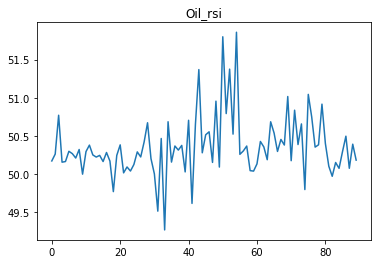

In [148]:
plt.plot(rsi_df)
plt.title("Oil_rsi")

In [115]:
rsi_df["rsi"].mean()

50.35943067733591

In [116]:
size = rsi_df.size
size

180

In [ ]:
def profit(step, rsi_df):
    # Baseline: rsi_df["rsi"].mean()
    base = rsi_df["rsi"].mean()
    b_s = 0
    s_s = 0

    b_f = 1
    s_f = 1

    b_v = 0
    s_v = 0

    profit = 0

    for row in rsi_df.iterrows():
        if row[1]["rsi"] > base:
            if b_f == 0:
                continue
            b_s = b_s + 1
            index = (row[1]["index"] + 1) * 14 - 1
            print(int(index)
#             b_v = df[index]
            if b_s == step:
                b_f = 0
                s_f = 1
                print("Sell at the price of $", b_v)
#                 profit = profit - b_v
                continue
        
        if row[1]["rsi"] < base:
            if s_f == 0:
                continue
            s_s = s_s + 1
            index = (row[1]["index"] + 1) * 14 - 1
            print(int(index)
#             s_v = df[index]
           # s_v = price at that time
            
            if s_s == step:
                s_f = 0
                b_f = 1
                print("Buy at the price of $", s_v)
#                 profit = profit + s_v
                continue
    

## Gas RSI

In [75]:
rs_list = []
rsi_list = []
for i in range(0, s, 14):
    if i >= 3000:
        break
    up_sum = 0
    up_flag = 0
    down_sum = 0
    down_flag = 0
    
    flag = 0
    for j in range(i, i + 14):
        if flag == 14:
            break
        try:
            r = df.iloc[j + 1]['Gas'] - df.iloc[j]['Gas']
            if r > 0:
                up_sum = up_sum + df.iloc[j + 1]['Gas']
                up_flag = up_flag + 1
            if r < 0:
                down_sum = down_sum + df.iloc[j + 1]['Gas']
                down_flag = down_flag + 1
            j = j + 1
            flag = flag + 1
        except:
            pass
    
    if up_flag + down_flag == 10 and up_sum == 19.73 and down_sum == 8.42:
        break
        
    mean_up = up_sum / up_flag
    mean_down = down_sum / down_flag
    
    rs = RS(mean_up, mean_down)
    rsi = RSI(rs)
    
    rs_list.append(rs)
    rsi_list.append(rsi)
    
#     n = 1
#     result[n] = rsi
#     n = n + 1

In [76]:
rs_df = pd.DataFrame({'rs': rs_list})
rs_df.head()


,rs
0,1.006166
1,0.980408
2,1.007349
3,1.020165
4,0.989715


In [77]:
rsi_df = pd.DataFrame({'rs': rsi_list})
rsi_df.head()

,rs
0,50.153674
1,49.505342
2,50.183062
3,50.499093
4,49.741549


Text(0.5,1,'Gas_rsi')

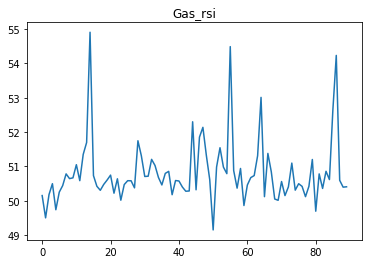

In [78]:
plt.plot(rsi_df)
plt.title("Gas_rsi")

In [97]:
oil_5, _ = rsi_df(s, 5, [])

In [98]:
oil_9, _ = rsi_df(s, 9, [])

In [99]:
oil_14, _ = rsi_df(s, 14, [])

In [100]:
oil_5["signal"] = oil_5["rsi"].apply (lambda x: change(x, oil_5['rsi'].mean()))
oil_5.to_csv("RSI_5.csv")

In [101]:
oil_9["signal"] = oil_9["rsi"].apply (lambda x: change(x, oil_9['rsi'].mean()))
oil_9.to_csv("RSI_9.csv")

In [102]:
oil_14["signal"] = oil_14["rsi"].apply (lambda x: change(x, oil_14['rsi'].mean()))
oil_9.to_csv("RSI_14.csv")

In [104]:
oil_5.head()

,date,oil_price,rsi,signal
0,5/14/13,103.59,50.170575,-1
1,5/21/13,104.27,50.270074,-1
2,5/29/13,100.46,50.170965,-1
3,6/5/13,100.43,50.312694,-1
4,6/12/13,104.07,50.546563,1


In [105]:
oil_9.head()

,date,oil_price,rsi,signal
0,5/20/13,103.59,50.170575,-1
1,6/3/13,102.14,50.241727,-1
2,6/14/13,103.51,50.247340,-1
3,6/27/13,105.21,50.481252,1
4,7/11/13,103.19,49.828613,-1


In [106]:
oil_14.head()

,date,oil_price,rsi,signal
0,5/28/13,102.14,50.170575,-1
1,6/17/13,103.11,50.260606,-1
2,7/8/13,103.96,50.769810,1
3,7/26/13,109.27,50.154574,-1
4,8/15/13,109.28,50.162852,-1
